In [2]:
from PIL import Image  
import numpy as np

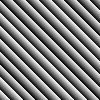

In [3]:
def rysuj_po_skosie_szare(h,w, a, b):  # formuła zmiany wartości elemntów tablicy a*i + b*j
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256 
    return tab


im_skos = Image.fromarray(rysuj_po_skosie_szare(100, 100, -20, 20))

im_skos

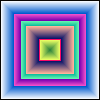

In [ ]:
def rysuj_ramki_kolorowe(w, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = 6
    kolor_g = 4
    kolor_b = 2
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r)%256
        kolor_g = (kolor_g - zmiana_koloru_g)%256
        kolor_b = (kolor_b - zmiana_koloru_b)%256
    return tab

rgb_im = Image.fromarray(rysuj_ramki_kolorowe(100,20,13,4))
rgb_im



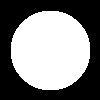

In [5]:
def rysuj_kolo(w, h, r, m, n, kolor): # koło o promieniu r i środku m, n, kolor = 0 lub 255
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if (i-n)**2+(j-m)**2 < r**2: # wzór na koło o środku (m_s, n_s) i promieniu r
                tab[i, j] = kolor 
            else: 
                tab[i, j] = 255 - kolor 
    return tab

kolo_im = Image.fromarray(rysuj_kolo(100,100,40,50,50, 255))
kolo_im

kanały obrazu RGB

In [ ]:
tab = rysuj_ramki_kolorowe(100,20,13,4)

t_r = tab[:, :, 0]
print("typ danych tablicy kanału r: ", t_r.dtype)
print("rozmiar elemntu tablicy kanału r: ",t_r.itemsize)
print("rozmiar tablicy kanału r: ",t_r.shape)
print("wymiar tablicy kanału r: ",t_r.ndim)
im_r = Image.fromarray(t_r) # obraz w odcieniach szarości kanału r
print("tryb kanału r: ", im_r.mode)

t_g= tab[:, :, 1]
im_g = Image.fromarray(t_g) # obraz w odcieniach szarości kanału g

t_b = tab[:, :, 2]
im_b = Image.fromarray(t_b) # obraz w odcieniach szarości kanału b

typ danych tablicy kanału r:  uint8
rozmiar elemntu tablicy kanału r:  1
rozmiar tablicy kanału r:  (100, 100)
wymiar tablicy kanału r:  (100, 100)
tryb kanału r:  L


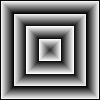

In [7]:
im_r

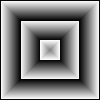

In [8]:
im_g

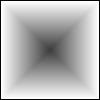

In [9]:
im_b

Tworzenie obrazu RGBA

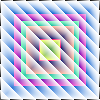

In [10]:

a = rysuj_po_skosie_szare(100, 100, 20, -20) # tablica kanału alfa
rgb  = rysuj_ramki_kolorowe(100,20,13,4)   # tablica RGB 

# Rozszerzenie wymiaru tablicy a do (100, 100, 1)
a_ext = np.expand_dims(a, axis=-1)

# Połączenie wzdłuż ostatniego wymiaru
combined = np.concatenate((rgb, a_ext), axis=-1) # tak samo działa combined = np.stack((rgb[..., 0], rgb[..., 1], rgb[..., 2], a[..., 0]), axis=-1)
#combined = np.stack((rgb[..., 0], rgb[..., 1], rgb[..., 2], a_ext[..., 0]), axis=-1)
rgba_im = Image.fromarray(combined)
rgba_im

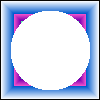

In [29]:
a = rysuj_kolo(100,100,40,50,50, 0) # tablica kanału alfa 

rgb  = rysuj_ramki_kolorowe(100,20,13,4)   # tablica RGB
a_ext = np.expand_dims(a, axis=-1)
combined = np.concatenate((rgb, a_ext), axis=-1)

rgba_im = Image.fromarray(combined)
rgba_im

Tworzenie obrazu w trybie CMYK na bazie tablicy obrazu RGBA

In [ ]:
a = rysuj_kolo(100,100,40,50,50, 0) # tablica kanału alfa 
rgb  = rysuj_ramki_kolorowe(100,20,13,4)   # tablica RGB

a_ext = np.expand_dims(a, axis=-1)
combined1 = np.concatenate((rgb, a_ext), axis=-1)


cmyk_im = Image.fromarray(combined1, mode='CMYK')

# cmyk_im.save('cmyk.tiff') # png nie obsługuje trybu 'CMYK'



Konwersja RGB na tryb CMYK

In [13]:

def rgb_to_cmyk(rgb_array):
    # Przekształć wartości RGB na zakres [0, 1]
    rgb = rgb_array.astype(float) / 255
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]

    # Oblicz kanał Kk (black)
    k = 1 - np.max(rgb, axis=2)

    # Uniknij dzielenia przez zero
    c = (1 - r - k) / (1 - k + 1e-8)
    m = (1 - g - k) / (1 - k + 1e-8)
    y = (1 - b - k) / (1 - k + 1e-8)

    # Zastąp NaN (dla czystej czerni) zerami
    c[np.isnan(c)] = 0
    m[np.isnan(m)] = 0
    y[np.isnan(y)] = 0

    # Przekształć na zakres [0, 255]
    cmyk = np.stack((c, m, y, k), axis=2) * 255
    return cmyk.astype(np.uint8)


t_rgb =  rysuj_ramki_kolorowe(100,20,13,4)

# Konwersja do CMYK
t_cmyk = rgb_to_cmyk(t_rgb)


image_cmyk = Image.fromarray(t_cmyk, mode="CMYK")
# image_cmyk.save("obraz_cmyk.jpg")
# image_cmyk.save("obraz_cmyk.tiff")

In [14]:
im = Image.open('obraz_cmyk.tiff')
t_im = np.asarray(im)
print(t_im.shape)

(100, 100, 4)


In [15]:

t_c = t_im[:, :, 0]
print("typ danych tablicy kanału c: ", t_c.dtype)
print("rozmiar elemntu tablicy kanału c: ",t_c.itemsize)
print("rozmiar tablicy kanału c: ",t_c.shape)
im_c = Image.fromarray(t_c) # obraz w odcieniach szarości kanału c
print("tryb kanału c: ", im_c.mode)

t_m = t_im[:, :, 1]
im_m = Image.fromarray(t_m) # obraz w odcieniach szarości kanału m

t_y = t_im[:, :, 2]
im_y = Image.fromarray(t_y) # obraz w odcieniach szarości kanału y

t_k = t_im[:, :, 3]
im_k = Image.fromarray(t_k) # obraz w odcieniach szarości kanału k

typ danych tablicy kanału c:  uint8
rozmiar elemntu tablicy kanału c:  1
rozmiar tablicy kanału c:  (100, 100)
tryb kanału c:  L


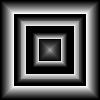

In [16]:
im_c

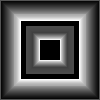

In [17]:
im_m

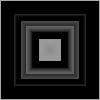

In [18]:
im_y

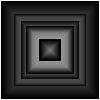

In [19]:
im_k